In [19]:
import jraph
import jax.numpy as jnp
import networkx as nx

In [11]:
node_features=jnp.array([[0.],[1.],[2.]])

In [4]:
senders = jnp.array([0,1,2])

In [5]:
receivers = jnp.array([1,2,0])

In [12]:
edges = jnp.array([[5.],[6.],[7.]])

In [7]:
n_node = jnp.array([len(node_features)])
n_edge = jnp.array([len(senders)])

In [8]:
global_context = jnp.array([[1]])

In [14]:
graph = jraph.GraphsTuple(nodes=node_features, senders=senders,
                          receivers=receivers, edges=edges, 
                          n_node=n_node, n_edge=n_edge, globals=global_context)

In [17]:
graph

GraphsTuple(nodes=DeviceArray([[0.],
             [1.],
             [2.]], dtype=float32), edges=DeviceArray([[5.],
             [6.],
             [7.]], dtype=float32), receivers=DeviceArray([1, 2, 0], dtype=int32), senders=DeviceArray([0, 1, 2], dtype=int32), globals=DeviceArray([[1]], dtype=int32), n_node=DeviceArray([3], dtype=int32), n_edge=DeviceArray([3], dtype=int32))

In [31]:
def convert_jraph_to_networkx_graph(jraph_graph: jraph.GraphsTuple) -> nx.Graph:
    nodes, edges, receivers, senders, _, _, _ = jraph_graph
    nx_graph = nx.DiGraph()
    if nodes is None:
        for n in range(jraph_graph.n_node[0]):
            nx_graph.add_node(n)
    else:
        for n in range(jraph_graph.n_node[0]):
            nx_graph.add_node(n, node_feature=nodes[n])
    if edges is None:
        for e in range(jraph_graph.n_edge[0]):
            nx_graph.add_edge(int(senders[e]), int(receivers[e]))
    else:
        for e in range(jraph_graph.n_edge[0]):
            nx_graph.add_edge(int(senders[e]), int(receivers[e]), edge_feature=edges[e])
    return nx_graph


def draw_jraph_graph_structure(jraph_graph: jraph.GraphsTuple) -> None:
    nx_graph = convert_jraph_to_networkx_graph(jraph_graph)
    pos = nx.spring_layout(nx_graph)
    nx.draw(nx_graph, pos=pos, with_labels=True, node_size=700, font_color='white',
            alpha=0.7,node_color="C2",node_shape="s")

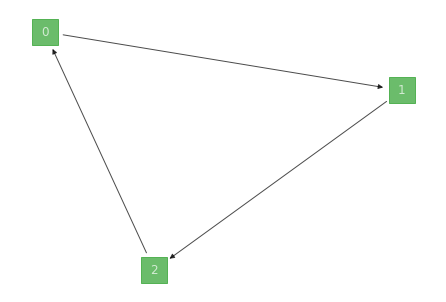

In [32]:
draw_jraph_graph_structure(graph)

In [ ]:
jraph.segment_mean()